# Assignment 1

# Task 1

Let
$C_d = \{\textrm{x}\in \mathbb{R}^p|\Arrowvert\textrm{x}\Arrowvert_\infty \leq \frac{d}{2}  \} $
denote the $p$-dimensional hypercube of edge length $d$, centered at the origin.


* Assume $X$ to be uniformly distributed in $C_1$. 
Determine $d$ in dependence of $p$
and $q \in[0,1]$,
such that
$$\textrm{Pr}(X \in C_d) = q$$
holds.


The size of $V_{C_1}$: $1^p = 1$.

The size of $V_{C_d}$: $d^p$.

$\textrm{Pr}(x\in C_d) = \frac{V_{C_d}}{V_{C_1}} = q$

$d = q^{1/p}$

* Let the components of the $p$-dimensional random variable $X^p$ be independent and have the standard normal distribution. It is known that 
$\textrm{Pr}(|X^1|_\infty\leq2.576) = 0.99$.
For an arbitrary $p$, determine the probability 
$\textrm{Pr}(\Arrowvert X^p\Arrowvert_\infty>2.576)$
for any of the components of $X^p$ to lie outside of the interval [-2.576, 2,576]. Evaluate the value for $p = 2$, $p = 3$ and $p = 500$.



$\textrm{Pr}(\Arrowvert X^1 \Arrowvert _ \infty > 2.576) = 0.01$

$\textrm{Pr}(\Arrowvert X^p \Arrowvert _ \infty > 2.576) =1 - \textrm{Pr}(\Arrowvert X^1 \Arrowvert _ \infty \leq 2.576)^p = 1 - 0.99^p$

$p$ = 2, value is $0.0199$

$p$ = 3, value is $0.029701$

$p$ = 500, value is $0.99343$

# Task 2

- Sample 100 uniformly distributed random vectors from the box $[−1,1]^d$ for $d = 2$. 


In [1]:
# import required libraries
import numpy as np
# generate 100 uniformly distributed random vectors between -1 and 1 with 2 dimensions
sample = np.random.uniform(-1,1,size=(2,100))

- For each of the 100 vectors determine the minimum angle to all other vectors. Then compute the average of these minimum angles. Note that for two vectors x, y the cosine of the angle between the two vectors is deﬁned as $$cos(\angle(x,y)) = \frac{\left< x,y \right>}{\Vert x \Vert \Vert y \Vert}$$

In [5]:
# import required libraries
import numpy as np
# generate 100 uniformly distributed random vectors between -1 and 1 with 2 dimensions
sample = np.random.uniform(-1,1,size=(2,100))
# normalize all the vectors to norm 1
for i in range(100):
    sample[:,i] = sample[:,i]/np.linalg.norm(sample[:,i]);
# get the dot product of each vector with other vectors, that is also the cos value 
cos_value = np.matmul(sample.T,sample)
# Because the type of value is float, the dot product may cause some unwanted data (such as 1.00000000002), we must modify them
cos_value = np.clip(cos_value,-1,1)
# get the angle from cos value
a = np.arccos(cos_value)
# we don't need the angle of a vector with itself (it must be minimum angle), so we set it to a very large value
for i in range(100):
    a[i,i] = 100
# get minimum angle of each vector with other vectors
min_angle = np.min(a,axis = 0)    
# calculate the average minimum angle  
mean_min_angle = np.mean(min_angle)*180/np.pi
print(mean_min_angle)

1.8414961543393975


- Repeat the above for dimensions $d = 1,...,1000$ and use the results to plot the average minimum angle against the dimension.

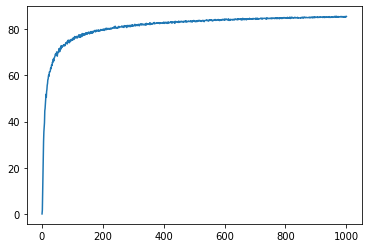

In [3]:
# import required libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# create an array to save the average minimum angle for different dimensions
mean_min_angle = np.zeros((1,1000))
for d in range(1,1001):
    sample = np.random.uniform(-1,1,size=(d,100))
    # normalize all the vectors to norm 1
    for i in range(100):
        sample[:,i] = sample[:,i]/np.linalg.norm(sample[:,i]);
    # get the dot product of each vector with other vectors, that is also the cos value 
    cos_value = np.matmul(sample.T,sample)
    # Because the type of value is float, the dot product may cause some unwanted data (such as 1.00000000002), we must modify them
    cos_value = np.clip(cos_value,-1,1)
    # get the angle from cos value
    a = np.arccos(cos_value)
    # we don't need the angle of a vector with itself (it must be minimum angle), so we set it to a very large value
    for i in range(100):
        a[i,i] = 100
    # get minimum angle of each vector with other vectors
    min_angle = np.min(a,axis = 0)   
    # save the average minimum angle for dimension d
    mean_min_angle[0,d-1] = np.mean(min_angle)*180/np.pi
# plot the average minimum angle against the dimension
dim = np.arange(1,1001,1)
plt.plot(dim,mean_min_angle[0])

- Give an interpretation of the result. What conclusions can you draw for 2 randomly sampled vectors in a d-dimensional space?

With the increase of dimension, the average minimum angle increases. The larger the dimension is, the samller the growth rate of average minimum angle is.


- Does the result change if the sample size increases?

Yes.

# Task 3

- The numbers in Figure 1 show the probability of the respective event to happen (e.g. the probability for the event $X = 1$ and $Y = 1$ is $0.02$). Is this table a probability table? If so, why?

Yes.\
Because $P(X) = P(X=1|Y)+P(X=2|Y) = 0.41+0.59 = 1$ and $P(Y) = P(Y=1|X)+P(Y=2|X)+P(Y=3|X) = 1.$

- Based on Figure 1 give the conditional expectation $E_{Y|X=2}[Y]$ and the probability of the event $X = 1$ under the condition that $Y = 3$.

$E_{Y|X=2}[Y] = \sum\limits_{i=1}^{3} i \cdot P(Y=i|X=2)= 1 \times \frac{0.4}{0.59} + 2 \times \frac{0.14}{0.59} + 3 \times \frac{0.05}{0.59} = 1.407$ \
$P(X=1|Y=3) = \frac{P(X=1,Y=3)}{P(Y=3)} = 0.13 \div (0.05+0.13) = 0.722$

- Is the function $p(x;y)$ given by 
$$p(x, y) = \begin{cases}
1 & for\ 0 \leq x \leq 1, 0 \leq y \leq \frac{1}{2}\\
0 & otherwise
\end{cases}$$
a joint density function for two random variables?

No.\
Because $\int_{-\infty}^{+\infty} p(x,y)dxdy=\int_0^1 \int_0^\frac{1}{2} 1dxdy\ = 0.5 \not= 1.$

- For two random variables $X$ and $Y$ the joint density function is given by
$$p(x, y) = \begin{cases}
2e^{-(x+y)} & for\ 0 \leq x \leq y, 0 \leq y\\
0 & otherwise
\end{cases}$$
What are the marginal density functions for $X$ and $Y$ respectively?


$\begin {align*}
p(x) &= \int_{-\infty}^{+\infty} p(x,y) dy \\
&= \int_x^{+\infty} 2e^{-(x+y)} dy \\
&= 2e^{-2x} & (x \geq 0)
\end{align*}
$
$\begin {align*}
p(y) &= \int_{-\infty}^{+\infty} p(x,y) dx \\
&= \int_0^y 2e^{-(x+y)} dx \\
&= 2e^{-y}(1-e^{-y}) & (y \geq 0)
\end{align*}
$

- Let the joint density function of two random variables $X$ and $Y$ be given by
$$p(x, y) = \begin{cases}
\frac{1}{15}(2x+4y) & for\ 0 < x < 3, 0 < y < 1\\
0 & otherwise
\end{cases}$$
Determine the probability for $X \leq 2$ under the condition that $Y = \frac{1}{2}$.


$p(y) = \int_0^3 \frac{1}{15}(2x+4y) dx = \frac{1}{5}(3+4y)\\
p(x|y) = \frac{p(x,y)}{p(y)} = \frac{1}{3} \cdot \frac{2x+4y}{3+4y}\\
P(X \leq 2|Y=\frac{1}{2}) = \int_0^2 \frac{2}{15}(x+1) dx = \frac{8}{15} = 0.53$

# Task 4

Show that the covariance matrix 
$\textrm{C}$ 
of any random variable 
$X \in \mathbb{R}^p$
is symmetric positive semidefinite, i.e. 
$\textrm{C = C}^\top$ 
and 
$\textrm{x}^\top\textrm{Cx}\ge0$ 
for any covariance matrix 
$C \in \mathbb{R}^{p\times{p}}$
and any
$\textrm x \in \mathbb{R}^p$.



$
\textrm C^\top 
= E\left[(X-\mu)(X-\mu)^\top\right]^\top 
= E\left[\left((X-\mu)(X-\mu)^\top\right)^\top\right]
= E\left[(X-\mu)(X-\mu)^\top\right]
= \textrm C
$

$\textrm{x}^\top\textrm{Cx} 
= \textrm{x}^\top E\left[(X-\mu)(X-\mu)^\top\right]\textrm{x} 
= E\left[\textrm{x}^\top (X-\mu)(X-\mu)^\top\textrm{x}\right]  
= E\left[\left((X-\mu)^\top \textrm{x}\right)^\top \left((X-\mu)^\top \textrm{x}\right)\right] 
= E\left[\Arrowvert (X-\mu)^\top \textrm{x}\Arrowvert ^2 \right] \ge0
$ 